Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.datasets import load_boston
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
# Loading the data set

boston = load_boston()
columns = boston.feature_names
df = pd.DataFrame(boston.data,columns=columns)
df["MEDV"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Find the data type of the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# Checking for missing values.

df.describe()

# No NAN values.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Declaring x & y.

x = df.drop(columns="MEDV")
y = df["MEDV"]

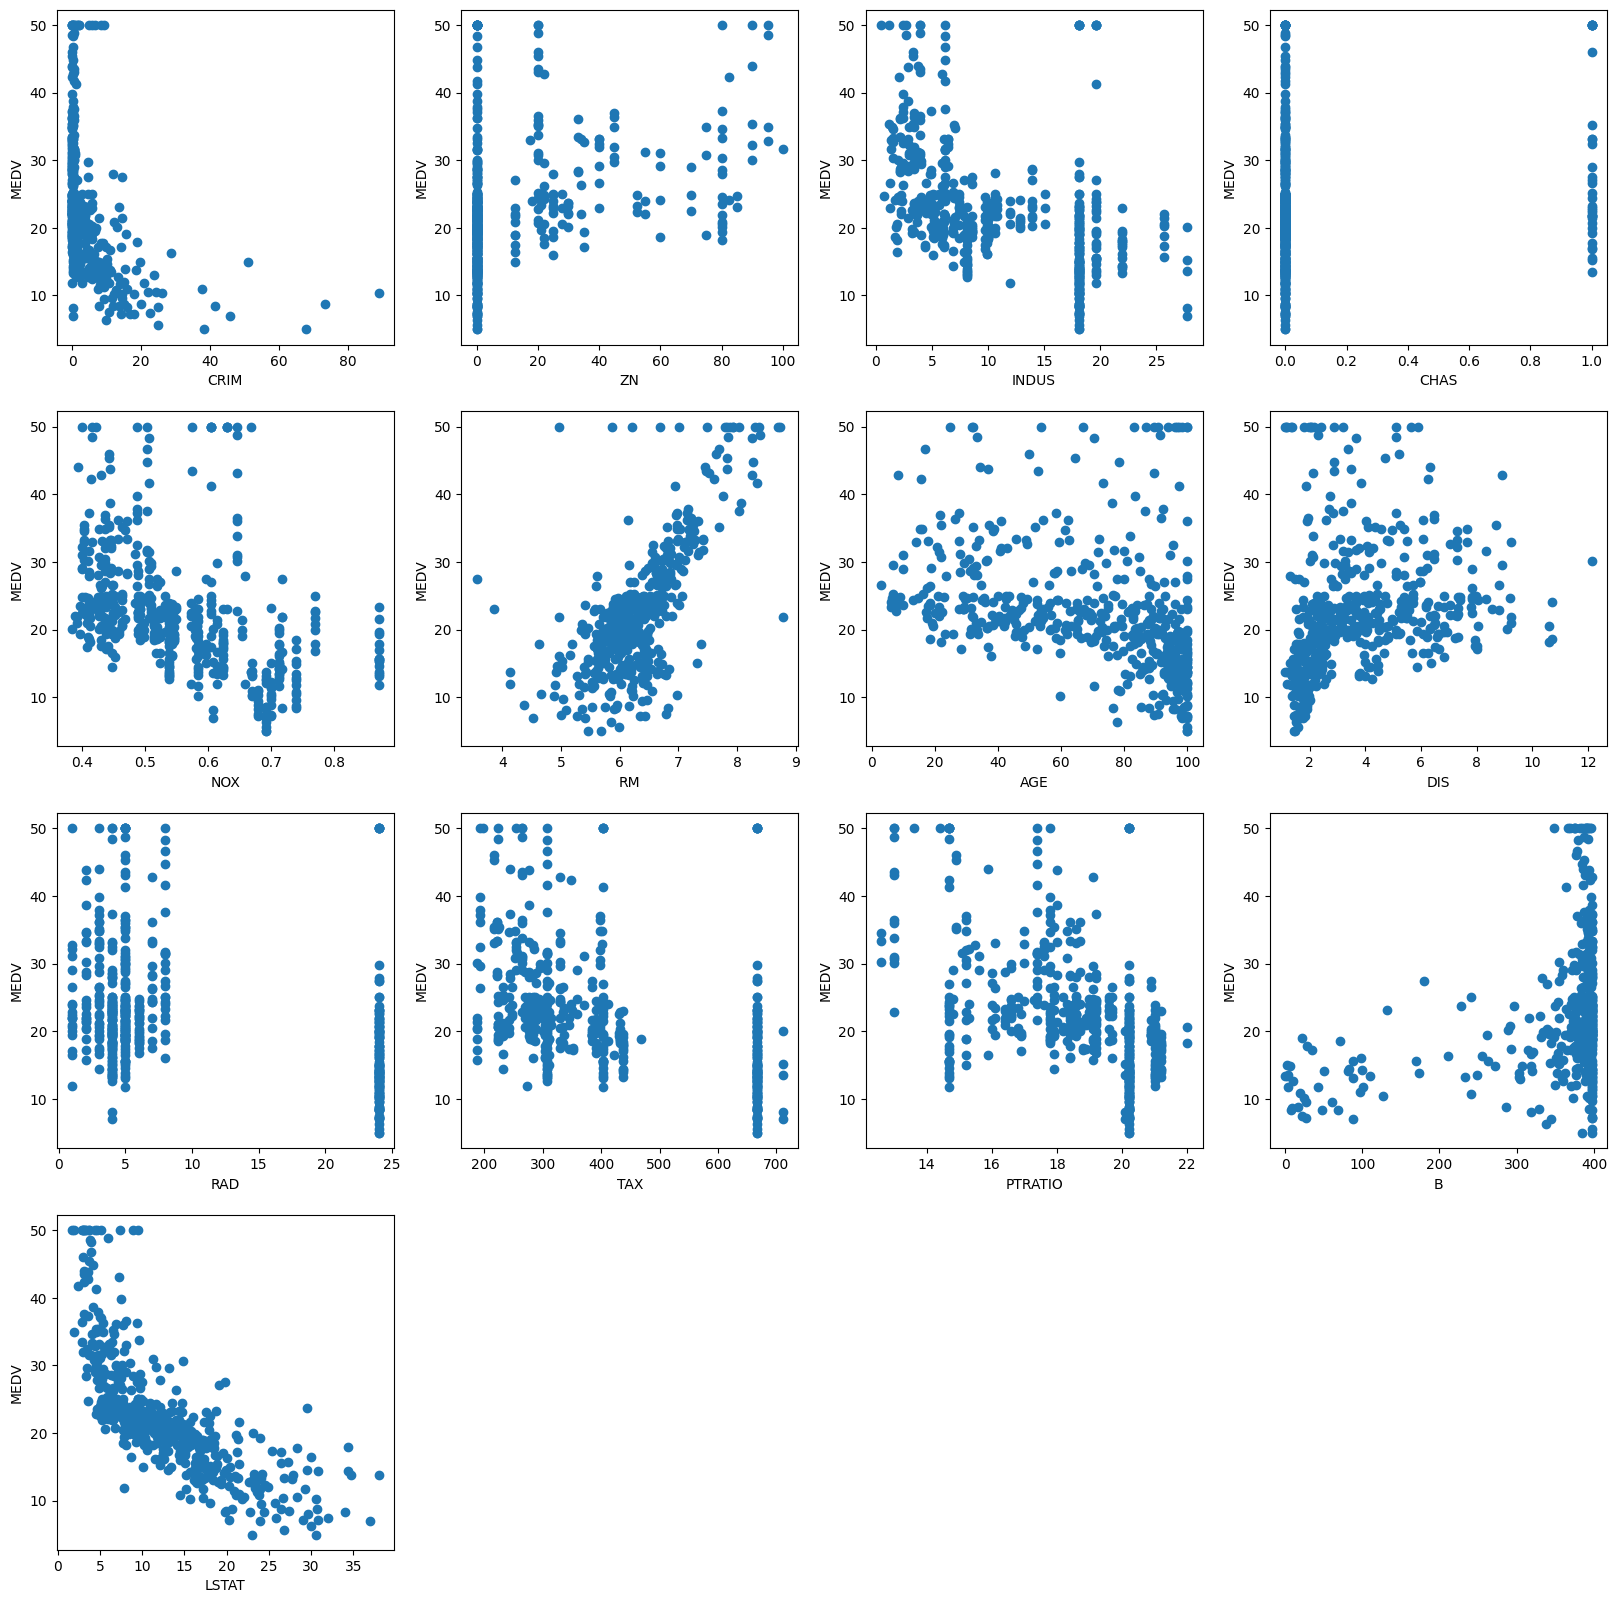

In [6]:
# Plotting scatter plot with dependent variables on x-axis and independent on y-axis

plt.figure(figsize=(20,20))
plot_num = 1
for i in x.columns:
    if plot_num<14:
        plt.subplot(4,4,plot_num)
        plt.scatter(x[i],y=y)
        plt.xlabel(i)
        plt.ylabel('MEDV')
        plot_num += 1
plt.show()

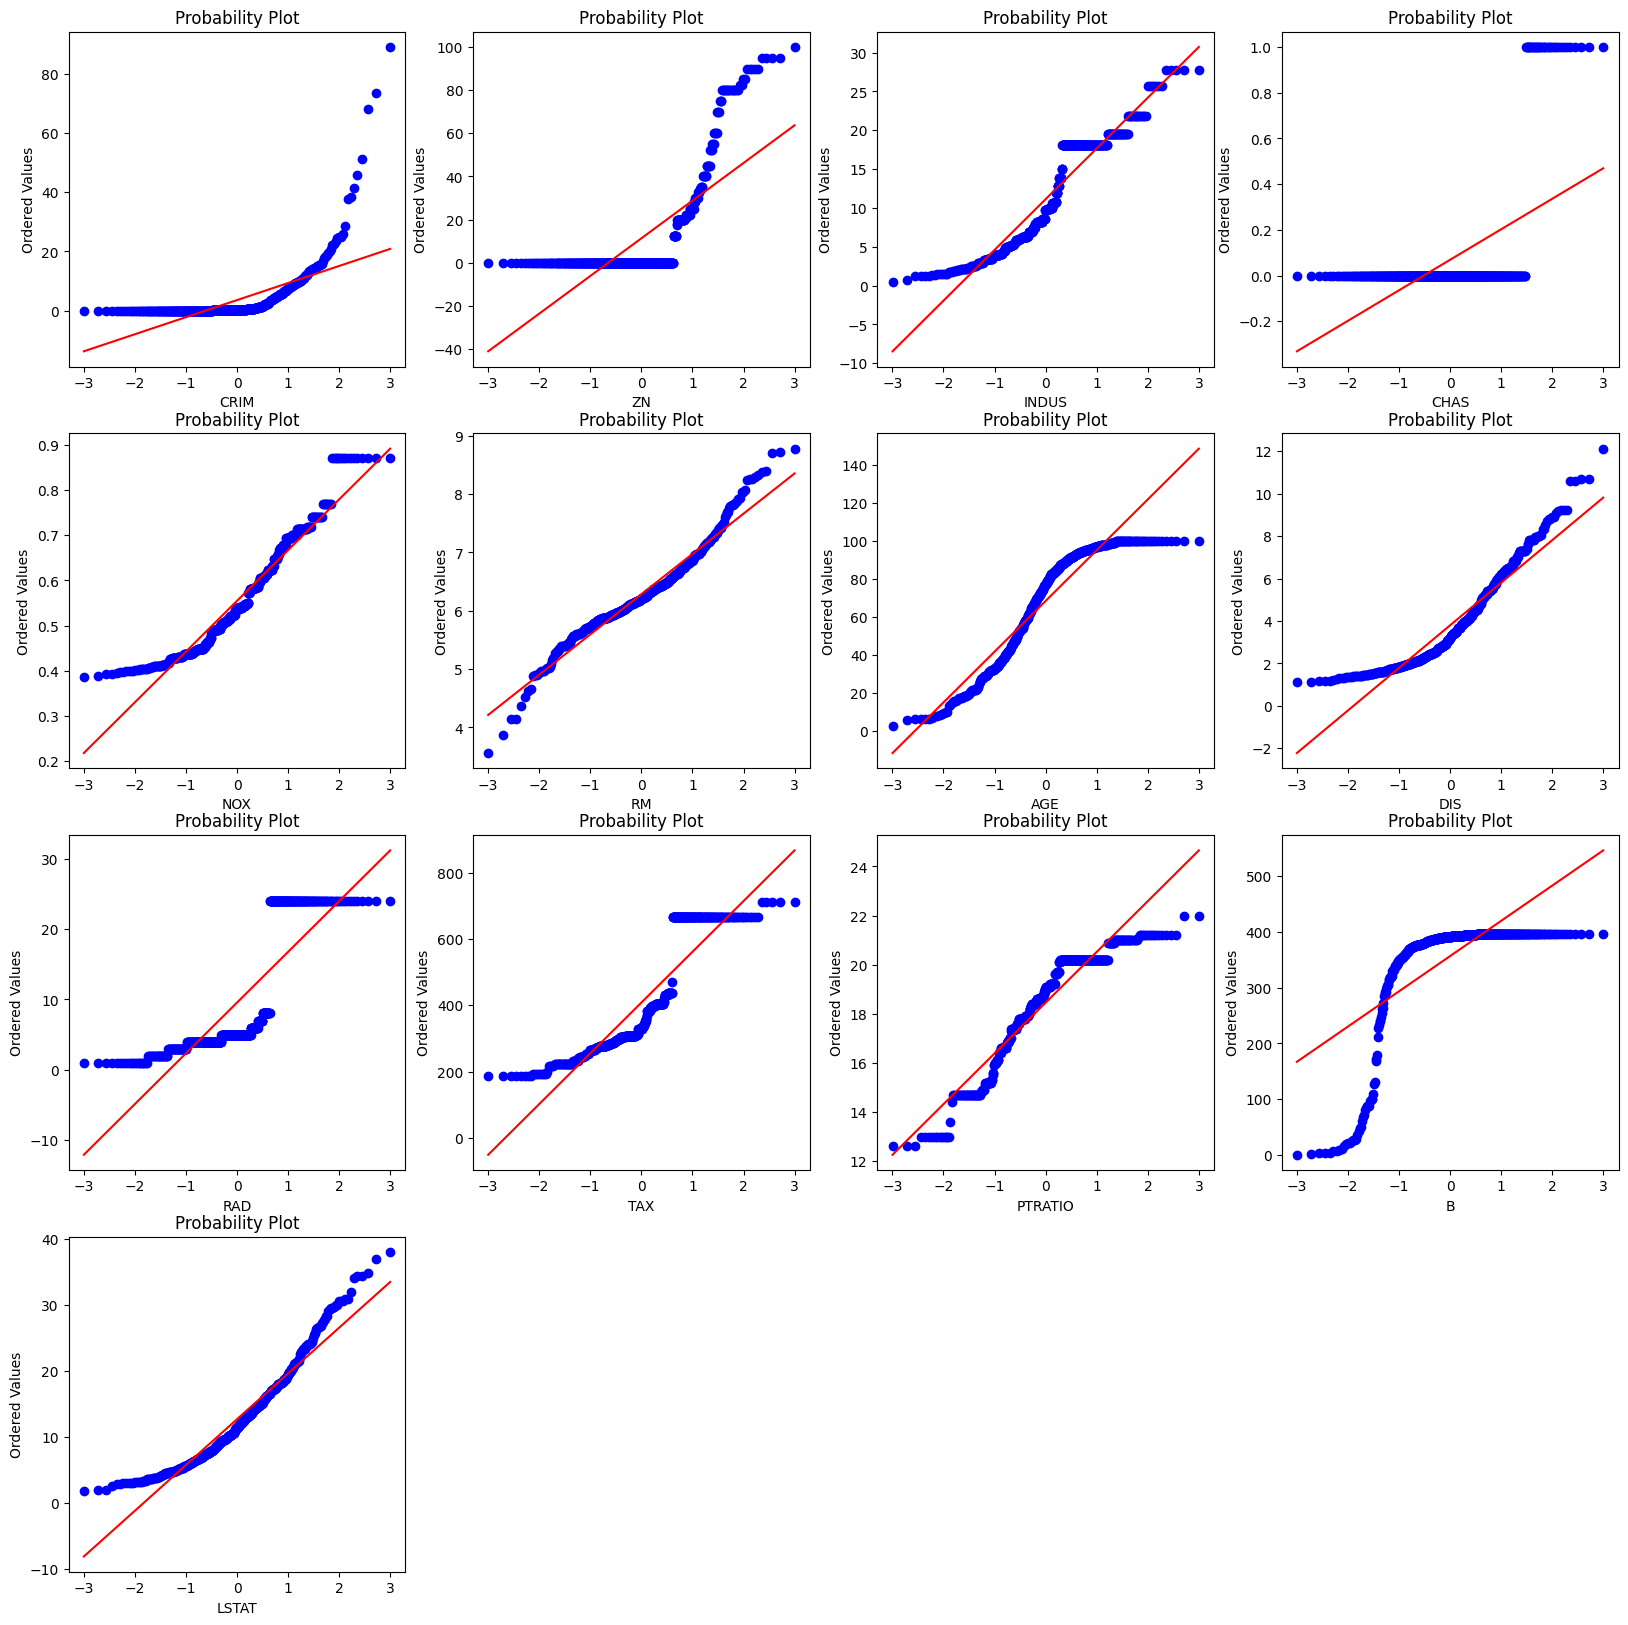

In [7]:
# checking the distribution with the help of "QQ-PLOT"

plt.figure(figsize=(20,20))
plot_num = 1
for i in x.columns:
    if plot_num<14:
        plt.subplot(4,4,plot_num)
        stat.probplot(x[i],dist="norm",plot=pylab)
        plt.xlabel(i)
        plot_num += 1
plt.show()

In [8]:
# standardizing the data_set since distribution is not normal.
# making a data_frame out of the scaled data.

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled,columns=x.columns)
df_scaled["MEDV"] = df["MEDV"]
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [9]:
# correlation between all columns.
# it is noticed that "TAX" is having high correlation with "RAD" & "INDUS". So we can remove "TAX".

corltn = df_scaled.corr()
corltn

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
# checking variation_inflation_factor

vif = pd.DataFrame()
vif['features'] = x.columns
vif["VIF"] = [variance_inflation_factor(x_scaled,i) for i in range(len(columns))]
vif

,features,VIF
0,CRIM,1.792192
1,ZN,2.298758
2,INDUS,3.991596
3,CHAS,1.073995
4,NOX,4.393720
5,RM,1.933744
6,AGE,3.100826
7,DIS,3.955945
8,RAD,7.484496
9,TAX,9.008554


In [11]:
# "TAX" is showing high VIF, means highly correlated.
# Checking the correlation of independent variables with dependent variable, by ordering them in descending order.
# "CHAS" is having very less contribution into the "y_feature", so we can check this using-
                                                   # "BACKWARD ELIMINATION", with the help of "OLS"


corltn['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

## BACKWARD_ELIMINATION_OLS

In [12]:
# Performing OLS on df_scaled.
# when "TAX" & "CHAS" was removed, only one percent of accuracy was reduced.()"CHAS" because it's less contribution into output.)

o_l_s = smf.ols(formula="MEDV~CRIM+ZN+INDUS+NOX+RM+AGE+DIS+RAD+PTRATIO+B+LSTAT",data=df_scaled).fit()
o_l_s.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sat, 26 Jun 2021   Prob (F-statistic):          4.47e-132
Time:                        15:53:34   Log-Likelihood:                -1510.5
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     494   BIC:                             3096.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.215    104.582      0.000      22.109      22.956
CRIM          -0.9661      0.288     -3.354      0.001      -1.532      -0.400
ZN             0.8334      0.318      2.617      0.009       0.208       1.459
INDUS         -0.3894      0.386     -1.008      0.314      -1.149       0.370
NOX           -2.1262      0.450     -4.723      0.000      -3.011      -1.242
RM             2.7878      0.299      9.338      0.000       2.201       3.374
AGE            0.0455      0.379      0.120      0.905      -0.699       0.790
DIS           -3.1580      0.428     -7.372      0.000      -4.000      -2.316
RAD            1.1955      0.363      3.295      0.001       0.483       1.908
PTRATIO       -2.2344      0.287     -7.796      0.000      -2.798      -1.671
B              0.9184      0.250      3.677      0.000       0.428       1.409
LSTAT         -3.7998      0.369    -10.301      0.000      -4.524      -3.075
==============================================================================
Omnibus:                      180.744   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              799.302
Skew:                           1.545   Prob(JB):                    2.71e-174
Kurtosis:                       8.326   Cond. No.                         5.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  But still the accuracy is much less on trainig data set itself. So we perform polynomial regression.

## POLYNOMIAL_REGRESSION

In [13]:
x = df_scaled.drop(columns=["MEDV"])
y = df_scaled["MEDV"]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=.20)

In [14]:
# Creating polynomialfeature object & converting x test & train data into polynomial funcion with degree=2. 

poly_func = PolynomialFeatures(degree=2)
poly_train = poly_func.fit_transform(x_train)
poly_test = poly_func.fit_transform(x_test)
lm = LinearRegression()

In [15]:
# Trained the model, and the score is checked for both train and test data set. 
# since columns without much contribution into output are also used, we will go with adjusted_R2

lm.fit(poly_train,y_train)
pred = lm.predict(poly_test)
print("train_score:-\t   ",lm.score(poly_train,y_train))
print("test_score:-\t   ",lm.score(poly_test,y_test))
print("\nMean_Square_Error:-",np.mean((y_test-pred)**2))

train_score:-	    0.9264047624976803
test_score:-	    0.9116945242685554

Mean_Square_Error:- 8.726999642055699


In [16]:
# Defining a function to find the adjusted R_sqaure.

def adj_r2(x,y):
    r2 = lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [17]:
print("Adjusted R_Square value:-  ",adj_r2(poly_train,y_train))
print("test_score:-\t\t   ",lm.score(poly_test,y_test))

Adjusted R_Square value:-   0.9004735546529032
test_score:-		    0.9116945242685554


### When adjusted R_Square was taken, the model gives a good train and test score. 